## Descripció

Anem a practicar i a familiaritzar-nos amb regressions

# Nivell 1

**- Exercici 1:**
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv

In [1]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from pycaret.regression import *
#from pycaret.classification import setup
#from pycaret.classification import compare_models

%matplotlib inline

# Data Frame: descàrrega i tractament inicial.

Prenem la base de dades original i eliminem la columna de l'any amb un únic valor. Després cal evitar els valors nuls amb 3 opcions: 
   1. Eliminar els registres amb valors nuls.
   2. Canviar el valor nul per la mediana de la columna.
   3. Canviar el valor nul per la mitja aritmètica de la columna.



In [2]:
flights2008_df=pd.read_csv('DelayedFlights.csv', index_col=0)
flights2008_df.drop(['Year'],axis=1,inplace=True) #eliminem l'any perquè tots els vols són del mateix any!!

Repetim les operacions de neteja fetes a la primera tasca del sprint 9 on eliminem els pocs registres que li falta la hora d'arribada real, amb el que no es pot treballar amb les dades de retrasos (suposen el 0,37% de les dades totals).

In [3]:
indexDel=list(flights2008_df[flights2008_df['ArrTime'].isnull()].index)#index de les línees que s'han de borrar
flights2008_df.drop(indexDel, inplace=True)

Canviem el valor del número d'avió (TailNum) a 'Unkown' pels 3 registres que no el tenen definit.

In [4]:
flights2008_df['TailNum'].fillna(value='Unknown',inplace=True)

Eliminem també les que falten dades de temps de vol o retràs en l'arrivada que manquen i són molt poques respecte el total.

In [5]:
indexDel=list(flights2008_df[flights2008_df['AirTime'].isnull()].index)#index de les línees que s'han de borrar
flights2008_df.drop(indexDel, inplace=True)
flights2008_df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Al netejar el dataframe no queden vols cancelats. Es poden borrar totes les columnes referents a la cancelació i desviació de vols.

In [6]:
flights2008_df.drop(['Cancelled','CancellationCode', 'Diverted'],axis=1,inplace=True)

Generarem un dataframe on s'**eliminen la resta de registres que són nuls**:

In [7]:
indexDel=list(flights2008_df[flights2008_df['CarrierDelay'].isnull()].index)#index de les línees que s'han de borrar
flights2008_df_dropNull=flights2008_df.copy()
flights2008_df_dropNull.drop(indexDel, inplace=True)

In [8]:
flights2008_df_dropNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247488 entries, 4 to 7009718
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1247488 non-null  int64  
 1   DayofMonth         1247488 non-null  int64  
 2   DayOfWeek          1247488 non-null  int64  
 3   DepTime            1247488 non-null  float64
 4   CRSDepTime         1247488 non-null  int64  
 5   ArrTime            1247488 non-null  float64
 6   CRSArrTime         1247488 non-null  int64  
 7   UniqueCarrier      1247488 non-null  object 
 8   FlightNum          1247488 non-null  int64  
 9   TailNum            1247488 non-null  object 
 10  ActualElapsedTime  1247488 non-null  float64
 11  CRSElapsedTime     1247488 non-null  float64
 12  AirTime            1247488 non-null  float64
 13  ArrDelay           1247488 non-null  float64
 14  DepDelay           1247488 non-null  float64
 15  Origin             1247488 non-n

In [9]:
flights2008_df_dropNull.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Generarem un 2n dataframe on es **canvien els valors nuls per la mediana de la columna**:

In [10]:
flights2008_df_median=flights2008_df.copy()

In [11]:
for i in ['CarrierDelay', 'WeatherDelay' ,'NASDelay','SecurityDelay','LateAircraftDelay']:
    flights2008_df_median[i].fillna(flights2008_df_median[i].median(), inplace = True)

In [12]:
flights2008_df_median.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Generarem un 3r dataframe on es **canvien els valors nuls per la mitjana aritmètica de la columna**:

In [13]:
flights2008_df_mean=flights2008_df.copy()
for i in ['CarrierDelay', 'WeatherDelay' ,'NASDelay','SecurityDelay','LateAircraftDelay']:
    flights2008_df_mean[i].fillna(flights2008_df_mean[i].mean(), inplace = True)
flights2008_df_mean.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Provarem tres regressions amb una mostra de 100000 registres del primer dataframe generat. El que s'han borrat els valors nuls

In [14]:
df1_reg=flights2008_df_dropNull.sample(n=100000,random_state=42)

In [15]:
df1_reg.head(2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6580677,12,1,1,1054.0,1027,1353.0,1256,YV,7322,N519LR,119.0,89.0,66.0,57.0,27.0,ORD,BUF,473,2.0,51.0,0.0,0.0,30.0,0.0,27.0
1293654,3,13,4,2113.0,2105,4.0,2348,XE,2624,N14143,171.0,163.0,141.0,16.0,8.0,IAH,MSP,1034,6.0,24.0,8.0,0.0,8.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
y=df1_reg.ArrDelay #prenem paràmetre de retràs a l'arribada (si=True/no=False) com l'objectiu

Obtenim dataframe amb només els valors numèrics i sense la columna objectiu:

In [17]:
X=df1_reg.loc[:,df1_reg.columns!='ArrDelay']
y=df1_reg['ArrDelay']
categor_index=X.dtypes[X.dtypes!='object'].index
X=X[categor_index]
X.head()[:2]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6580677,12,1,1,1054.0,1027,1353.0,1256,7322,119.0,89.0,66.0,27.0,473,2.0,51.0,0.0,0.0,30.0,0.0,27.0
1293654,3,13,4,2113.0,2105,4.0,2348,2624,171.0,163.0,141.0,8.0,1034,6.0,24.0,8.0,0.0,8.0,0.0,0.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 20) (30000, 20) (70000,) (30000,)


Estudiem la matriu de correlació:

# Evaluació de coeficients de correlació i p values:

Generem la matriu de correlació entre variables i l'estudiem de forma gràfica:

<AxesSubplot:>

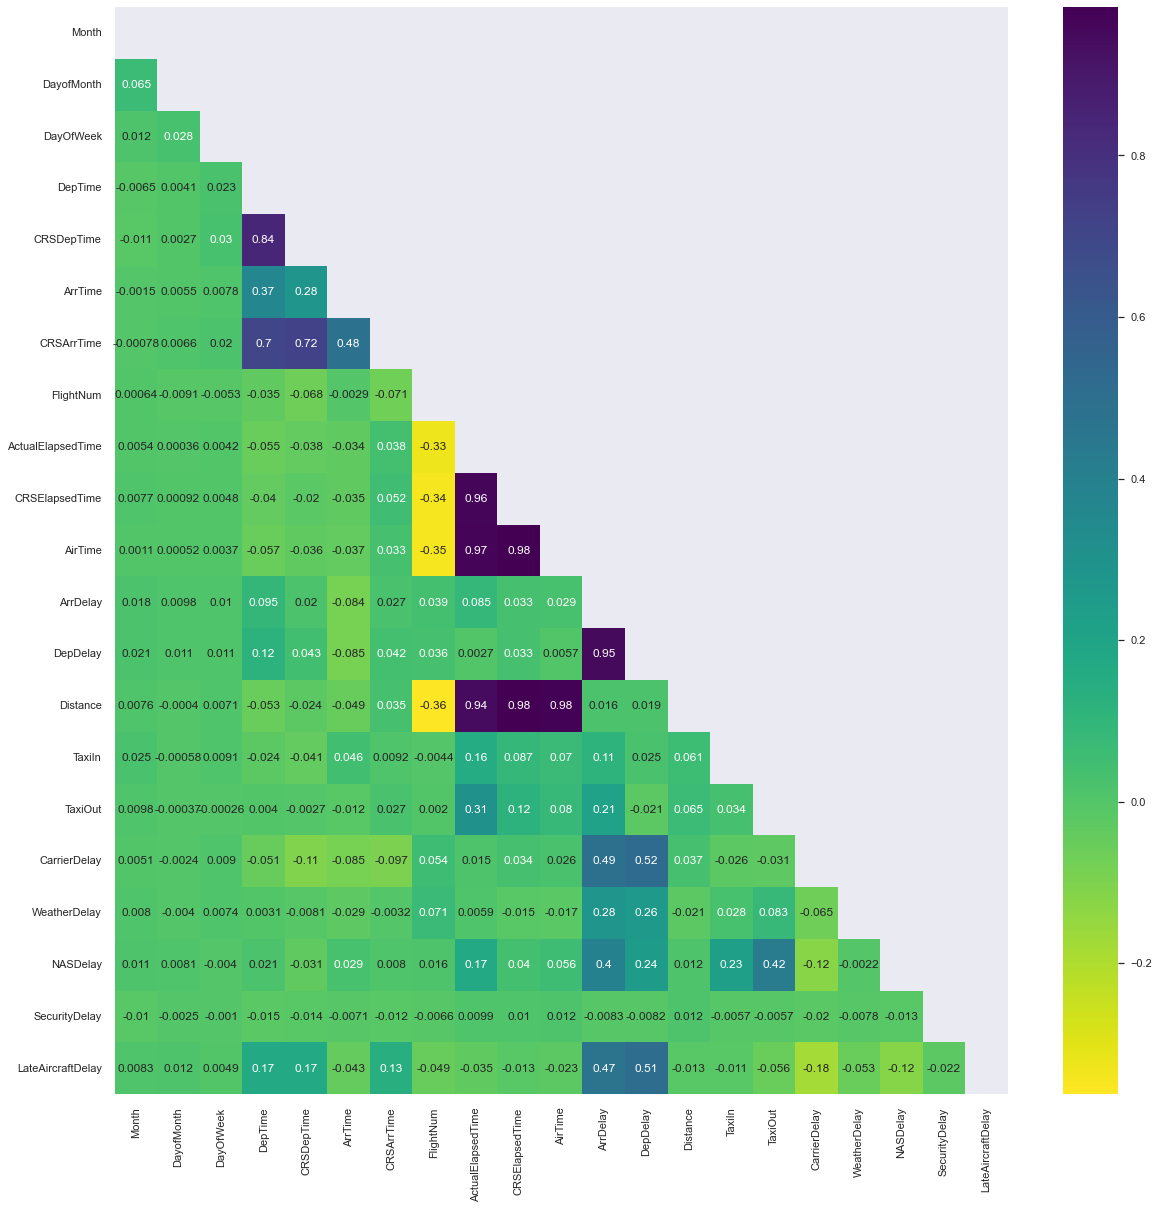

In [20]:
sns.set(rc = {'figure.figsize':(20,20)})
mask = np.triu(np.ones_like(df1_reg.corr(), dtype=bool))
sns.heatmap(df1_reg.corr(),cmap='viridis_r',annot=True,mask=mask)

La correlació entre ArrDelay i DepDelay és directe i molt forta. D'altra banda, s'observa una forta correlació entre distancia vs el temps de vol, vs el temps previst/real. I s'observa la correlació lògica entre les previsions de sortida i els valors reals, així com correlacions entre sortida i arribada. Per simplificar el model es podrien borrar les variables amb menys correlació. Si fixem un límit de <0.15 (valor absolut) . Mirem si hi ha diferències substancials de correlació entre els diferents dataframes que hem genPererat:

Per un altre costat, mirem les diferències de correlació amb els 3 dataframes que hem generat:

In [21]:
corr1 = flights2008_df_mean[flights2008_df_mean.columns].corr()['ArrDelay']
corr1

Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
CarrierDelay         0.431792
WeatherDelay         0.227717
NASDelay             0.333548
SecurityDelay       -0.002141
LateAircraftDelay    0.411440
Name: ArrDelay, dtype: float64

In [22]:
corr2 = flights2008_df_median[flights2008_df_median.columns].corr()['ArrDelay']
corr2

Month               -0.000897
DayofMonth           0.004129
DayOfWeek            0.006123
DepTime              0.127017
CRSDepTime           0.044447
ArrTime             -0.050948
CRSArrTime           0.043078
FlightNum            0.061266
ActualElapsedTime    0.068130
CRSElapsedTime      -0.015676
AirTime             -0.000189
ArrDelay             1.000000
DepDelay             0.952927
Distance            -0.029853
TaxiIn               0.156277
TaxiOut              0.286484
CarrierDelay         0.535141
WeatherDelay         0.277743
NASDelay             0.437238
SecurityDelay        0.011167
LateAircraftDelay    0.519032
Name: ArrDelay, dtype: float64

In [23]:
corr3=flights2008_df_dropNull[flights2008_df_dropNull.columns].corr()['ArrDelay']
corr3

Month                0.012337
DayofMonth           0.009077
DayOfWeek            0.011904
DepTime              0.093979
CRSDepTime           0.017091
ArrTime             -0.079233
CRSArrTime           0.024996
FlightNum            0.035808
ActualElapsedTime    0.083737
CRSElapsedTime       0.031565
AirTime              0.027507
ArrDelay             1.000000
DepDelay             0.950324
Distance             0.014957
TaxiIn               0.116313
TaxiOut              0.208443
CarrierDelay         0.501773
WeatherDelay         0.264624
NASDelay             0.387606
SecurityDelay       -0.002488
LateAircraftDelay    0.478123
Name: ArrDelay, dtype: float64

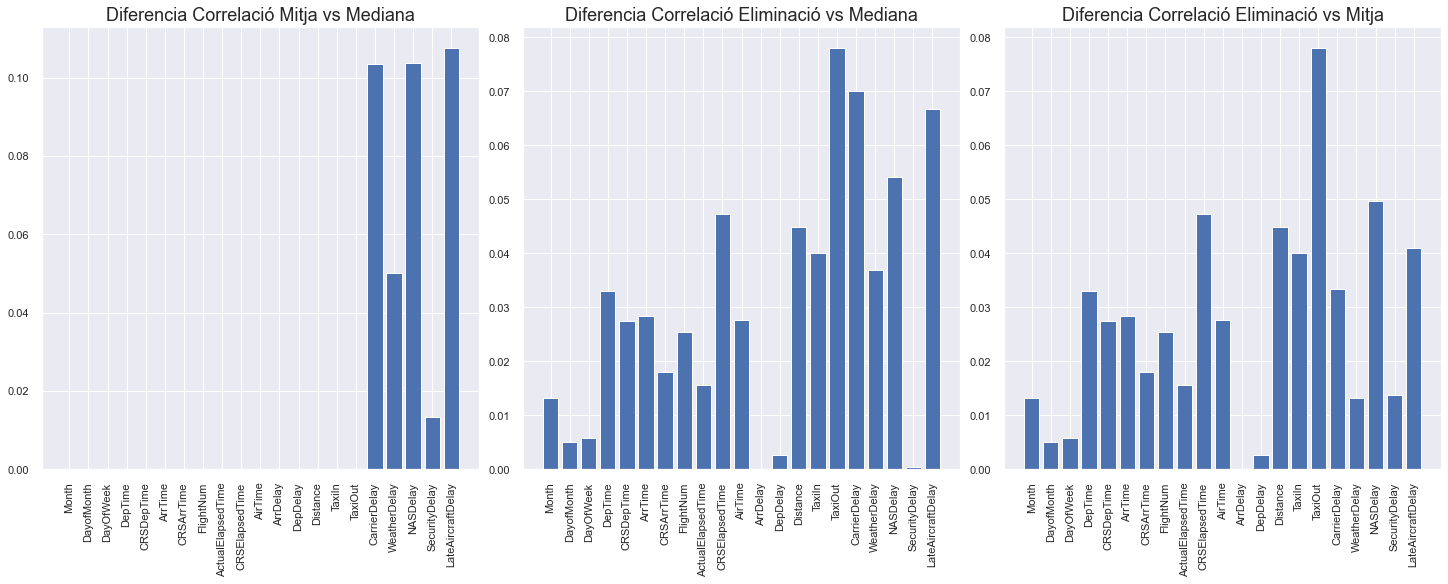

In [24]:
sns.set(rc = {'figure.figsize':(20,8)})

fig = plt.figure(constrained_layout=True)
ax_array = fig.subplots(1, 3, squeeze=False)

ax_array[0, 0].bar((corr1-corr2).index, abs((corr1-corr2).values))
ax_array[0,0].set_title('Diferencia Correlació Mitja vs Mediana',size=18)

ax_array[0, 1].bar((corr1-corr3).index, abs((corr1-corr3).values))
ax_array[0,1].set_title('Diferencia Correlació Eliminació vs Mediana',size=18)

ax_array[0, 2].bar((corr3-corr2).index,abs((corr3-corr2).values))
ax_array[0,2].set_title('Diferencia Correlació Eliminació vs Mitja',size=18)
for i in range(3):
    ax_array[0,i].set_xticklabels(labels= corr1.index, rotation=90, ha='center')

De les gràfiques anteriors s'en pot extreure que els canvis aplicats al dataframe repercuteixen en lleugeres diferències de correlació amb el retràs d'arribada. Aplicar un o altra Dataframe pot millorar o empitjorar el model. Emprar un o altre dataframe entestaria dintre l'exercici d'enginyeria de les dades.

Hi ha diferents paràmtres que no són estadísticament significatius amb aquest model (p>0.05!!). A més, com que el coeficient és molt proper a 0 podrien ser candidats de ser eliminats per a simplificar.

# Testing la multicolineabilitat

Per detectar la multicolineabilitat i evitar treballar amb variables altament correlacionades  calcularem el VIF (Variance Inflation Factor). Per tal d'evaluar-ho treballarem només amb les variables/paràmetres numèrics:

In [20]:
df1_reg_num_index=df1_reg.dtypes[df1_reg.dtypes!='object'].index
df1_reg_num=df1_reg[df1_reg_num_index]
df1_reg_num.head()[:2]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6580677,12,1,1,1054.0,1027,1353.0,1256,7322,119.0,89.0,66.0,57.0,27.0,473,2.0,51.0,0.0,0.0,30.0,0.0,27.0
1293654,3,13,4,2113.0,2105,4.0,2348,2624,171.0,163.0,141.0,16.0,8.0,1034,6.0,24.0,8.0,0.0,8.0,0.0,0.0


In [21]:

df1_reg.shape[1]

25

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcul_vif(df):
    df_vif = pd.DataFrame()
    df_vif["Paràmetres"] = df.columns
    df_vif["VIF"] = [round(variance_inflation_factor(df.values, i),3) for i in range(df.shape[1])]
    
    return(df_vif)

In [23]:
round(calcul_vif(X_train),3)

,Paràmetres,VIF
0,Month,3.789000e+00
1,DayofMonth,3.954000e+00
2,DayOfWeek,4.573000e+00
3,DepTime,4.974400e+01
4,CRSDepTime,5.182000e+01
5,ArrTime,1.137700e+01
6,CRSArrTime,3.624300e+01
7,FlightNum,2.490000e+00
8,ActualElapsedTime,inf
9,CRSElapsedTime,1.560906e+09


Es considera problemàtic si VIF>=10 (o >=5 si s'és més extricte) i hi han varis valors que són molt més grans. Eliminem tots els que són inf a excepció del Depdelay

In [24]:
X=df1_reg.loc[:,df1_reg.columns!='ArrDelay']
y=df1_reg['ArrDelay']
categor_index=X.dtypes[X.dtypes!='object'].index
X=X[categor_index]
X.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [25]:
df_reduced=X.copy()
df_reduced.drop(['ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','CarrierDelay',
                              'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_reduced, y, test_size=0.3, random_state=1)
calcul_vif(X_train)

,Paràmetres,VIF
0,Month,3.718
1,DayofMonth,3.887
2,DayOfWeek,4.481
3,DepTime,49.473
4,CRSDepTime,51.321
5,ArrTime,11.047
6,CRSArrTime,35.702
7,FlightNum,2.336
8,DepDelay,2.039
9,Distance,2.850


D'acord a la lògica i la colineabilitat detectada eliminem el DepTime i ArrTime que abans de viatjar no és coneixeria i estan directament relacionats amb els previstos (CRM)

In [26]:
df_reduced2=X.drop(['ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','CarrierDelay',
                              'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay', 'ArrTime','DepTime'], axis=1)
df_reduced2.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'FlightNum', 'DepDelay', 'Distance'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced2, y, test_size=0.3, random_state=1)
calcul_vif(X_train)

,Paràmetres,VIF
0,Month,3.695
1,DayofMonth,3.858
2,DayOfWeek,4.446
3,CRSDepTime,25.773
4,CRSArrTime,26.721
5,FlightNum,2.305
6,DepDelay,1.961
7,Distance,2.839


Encara hi ha una altra correlació entre l'horari previst de sortida i el previst d'arribada (com és lògic). Eliminem el CRSArrTime que és el que té VIF més alta i verifiquem nous VIF:

In [28]:
df_reduced3=X.drop(['ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','CarrierDelay',
                              'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay', 'ArrTime',
                            'DepTime','CRSArrTime'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_reduced3, y, test_size=0.3, random_state=1)
calcul_vif(X_train)

,Paràmetres,VIF
0,Month,3.670
1,DayofMonth,3.829
2,DayOfWeek,4.417
3,CRSDepTime,7.401
4,FlightNum,2.287
5,DepDelay,1.957
6,Distance,2.760


Ara sí, ja tots els valors de VIF són <10. Provem els models de regressió:

# Diferents models de regressió

Per tal d'avaluar els diferents models, d'una banda generem un mètode per calcular l'error comès entre predicció i valor real:

In [65]:
def calc_error (y_pred,y_real):#han de ser array's!!
    error=0
    for i in range(len(y_real)):
        error+=(abs(y_pred[i]-y_real.values[i])/y_real.values[i])
    error=100*error/len(y_real)
    return error   

Al comparar l'error entre les prediccions fetes al training set i amb el test set podrem avaluar si hi ha hagut overfitting. Si l'error amb el test set és >> que amb el training set seria una indicació de overfitting.

D'altra banda, generem un altre mètode per generar la representación gràfiques dels residuals respecte el valor de la predicció. La graficació ens pot donar imatges de patrons que implica que en l'elaboració del model s'ha desestimat informació rellevant que repercuteix en l'estructura dels residuals. Amb experiència, cert patrons ens poden indicar com millorar el model/dades inicials.

In [66]:
def plot_residuals(y_predic,y_real,algoritm_name):
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    preds = pd.DataFrame({"preds":y_predic, "true":y_real.values})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter",alpha=0.2,s=2)
    plt.title(f"Residual plot in {algoritm_name}")

In [67]:
method_regression=['Linear','Ridge','KNN','Bayesian','Random Forest']
train_err=[]
test_err=[]

## Linear regression

In [68]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_lin_predic=list(lin_reg.predict(X_train))
y_lin_predic_test=list(lin_reg.predict(X_test))

In [69]:
print(f"Train error = {round(calc_error(y_lin_predic,y_train),2)}% in multilinear regression.")
print(f"Test error = {round(calc_error(y_lin_predic_test,y_test),2)}% in multilinear regression.")
train_err.append(round(calc_error(y_lin_predic,y_train),2))
test_err.append(round(calc_error(y_lin_predic_test,y_test),2))

Train error = 27.8% in multilinear regression.
Test error = 27.82% in multilinear regression.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


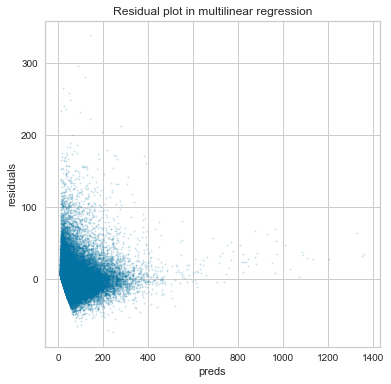

In [70]:
plot_residuals(y_lin_predic,y_train,'multilinear regression')

## Ridge Regression

In [71]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_RR_predict=model.predict(X_train)
y_RR_predict_test=model.predict(X_test)

In [72]:
print(f"Train error = {round(calc_error(y_RR_predict,y_train),2)}% in Ridge regression.")
print(f"Test error = {round(calc_error(y_RR_predict_test,y_test),2)}% in Ridge regression.")
train_err.append(round(calc_error(y_RR_predict,y_train),2))
test_err.append(round(calc_error(y_RR_predict_test,y_test),2))

Train error = 27.8% in Ridge regression.
Test error = 27.82% in Ridge regression.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


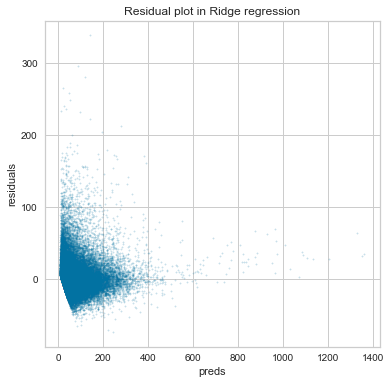

In [73]:
plot_residuals(y_RR_predict,y_train,'Ridge regression')

## KNN

In [74]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y2_knn=knn.predict(X_test)

In [75]:
print(f"Train error = {round(calc_error(y1_knn,y_train),2)}%  in knn algorithm.")
print(f"Test error = {round(calc_error(y2_knn,y_test),2)}% in knn algorithm.")
train_err.append(round(calc_error(y1_knn,y_train),2))
test_err.append(round(calc_error(y2_knn,y_test),2))

Train error = 35.27%  in knn algorithm.
Test error = 44.44% in knn algorithm.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


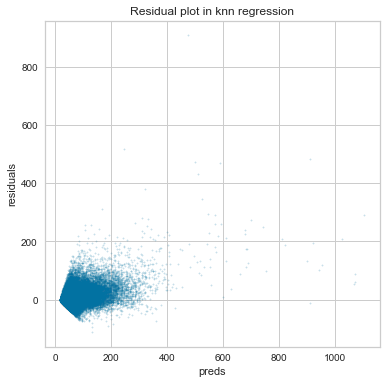

In [76]:
plot_residuals(y1_knn,y_train,'knn regression')

## Bayesian Regression

In [77]:
bay = linear_model.BayesianRidge()
bay.fit(X_train,y_train)
y1_bay=bay.predict(X_train)
y2_bay=bay.predict(X_test)

In [78]:
print(f"Train error = {round(calc_error(y1_bay,y_train),2)}% in Bayesian Regression")
print(f"Test error = {round(calc_error(y2_bay,y_test),2)}% in Bayesian Regression")
train_err.append(round(calc_error(y1_bay,y_train),2))
test_err.append(round(calc_error(y2_bay,y_test),2))

Train error = 27.8% in Bayesian Regression
Test error = 27.82% in Bayesian Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


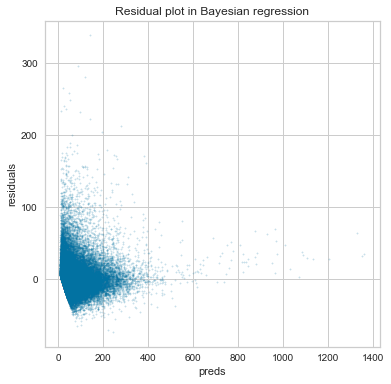

In [79]:
plot_residuals(y1_bay,y_train,'Bayesian regression')

## Random Forest Regression

In [80]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [81]:
rf.fit(X_train,y_train)
y1_rf=rf.predict(X_train)
y2_rf=rf.predict(X_test)

In [82]:
print(f"Train error = {round(calc_error(y1_rf,y_train),2)}% in Random Forest Regression")
print(f"Test error = {round(calc_error(y2_rf,y_test),2)}% in Random Forest Regression")
train_err.append(round(calc_error(y1_rf,y_train),2))
test_err.append(round(calc_error(y2_rf,y_test),2))

Train error = 10.65% in Random Forest Regression
Test error = 28.62% in Random Forest Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


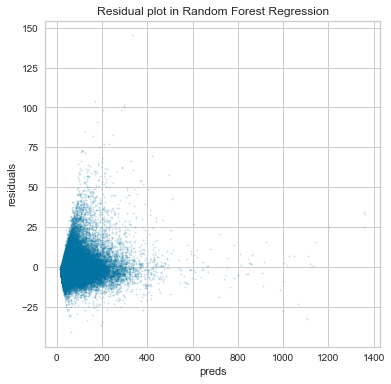

In [83]:
plot_residuals(y1_rf,y_train,'Random Forest Regression')

In [84]:
metrics_pred=pd.DataFrame({'Models': method_regression,'Train_err':train_err, 'Test_err':test_err})
metrics_pred


,Models,Train_err,Test_err
0,Linear,27.80,27.82
1,Ridge,27.80,27.82
2,KNN,35.27,44.44
3,Bayesian,27.80,27.82
4,Random Forest,10.65,28.62


Per les metodologies de KNN i Random Forest sembla que hi ha overfitting. 
En referència als residuals, hi ha patrons de comportaments que indiquen que hi ha informació no extreta que els condiciona. El més provable és que al eliminar tants paràmetres hem perdut informació rellevant per a la regressió.

**- Exercici 2:**
Compara’ls en base al MSE i al R2.


Complementem el dataframe anterior de mètrica dels ressultats:

In [85]:
metrics_pred['MAE']=round(metrics_pred['Test_err']/100,3)
squared_r=[]
for i in [y_lin_predic_test,y_RR_predict_test,y2_knn,y2_bay,y2_rf]:
    squared_r.append(round(r2_score(list(y_test.values),list(i)),3))
metrics_pred['r2']=squared_r

In [86]:
metrics_pred

,Models,Train_err,Test_err,MAE,r2
0,Linear,27.80,27.82,0.278,0.902
1,Ridge,27.80,27.82,0.278,0.902
2,KNN,35.27,44.44,0.444,0.713
3,Bayesian,27.80,27.82,0.278,0.902
4,Random Forest,10.65,28.62,0.286,0.904


Font

**Feature Selction:**https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6539936-improve-your-feature-selection

**- Exercici 3:**
Entrena’ls utilitzant els diferents paràmetres que admeten.


Estudiem els hiperparàmetres de les següents metodologies Ridge Regresion, Random Forest Regresion i KNN regresion:

### Ridge Regresion

In [87]:
ridge_params = {'alpha':[200, 250,300, 500, 700]}

In [88]:
lmr=linear_model.Ridge()
optim_Ridge_model= GridSearchCV(lmr, 
                               param_grid=ridge_params)
optim_Ridge_model.fit(X_train,y_train).best_estimator_

Ridge(alpha=700, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
y_opt_RR_predict=optim_Ridge_model.predict(X_train)
y_opt_RR_predict_test=optim_Ridge_model.predict(X_test)

In [90]:
print(f"Train error = {round(calc_error(y_opt_RR_predict,y_train),2)}% in Ridge regression (optimised).")
print(f"Test error = {round(calc_error(y_opt_RR_predict_test,y_test),2)}% in Ridge regression(optimised).")
print(f'R2: {round(r2_score(list(y_test.values),list(y_opt_RR_predict_test)),3)}')
#train_err.append(round(calc_error(y_opt_RR_predict,y_train),2))
#test_err.append(round(calc_error(y_opt_RR_predict_test,y_test),2))

Train error = 27.8% in Ridge regression (optimised).
Test error = 27.82% in Ridge regression(optimised).
R2: 0.902


No s'ha aconseguit millorar la regressió optimitzant els hipermarametres.

### Random Forest Regresion

[1, 2, 4, 8, 16, 32, 64, 128]


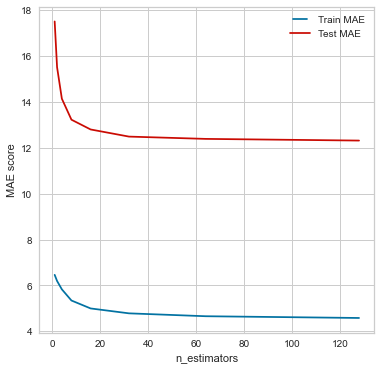

In [91]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128]

print(n_estimators)
train_results = []
test_results = []
train_results_rsquared = []
test_results_rsquared = []
for estimator in n_estimators:
    dt = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_results.append(mean_absolute_error(y_train, train_pred))
    train_results_rsquared.append(r2_score(y_train, train_pred)) 
    y_pred = dt.predict(X_test)
    test_results.append(mean_absolute_error(y_test, y_pred))
    test_results_rsquared.append(r2_score(y_test, y_pred))
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train MAE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('n_estimators')
plt.show()

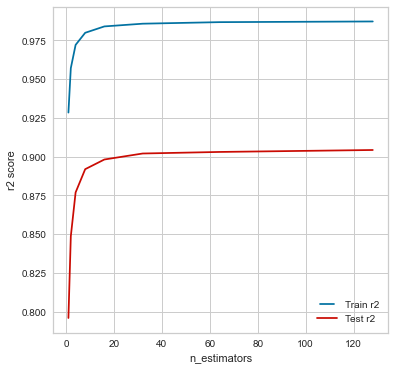

In [92]:
line1, = plt.plot(n_estimators, train_results_rsquared, 'b', label='Train r2')
line2, = plt.plot(n_estimators, test_results_rsquared, 'r', label='Test r2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('r2 score')
plt.xlabel('n_estimators')
plt.show()

Segons les gràfiques anteriors,  70 seria un valor optim per aplicar al n_estimators en el model de Random Forest.

### KNN Regresion

In [93]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [94]:
# Recerca dels hiperparametres
# Validació Creuada en 3 parts
kfold = KFold(n_splits=3, shuffle=True, random_state=101)
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [95]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8357278260514974
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')
{'n_neighbors': 3, 'weights': 'distance'}


R2 millora sensiblement de 0.72 a 0.84 ajustant els hiperparàmetres a {'n_neighbors': 3, 'weights': 'distance'}

**Fonts**

Afinar el model amb els hiperparàmetres: https://alfurka.github.io/2018-11-18-grid-search/
Afinar Hyperparametres en KNN: https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6559796-tune-your-hyperparameters







# Validació interna

**- Exercici 4:**
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)


### Linear Regression

In [96]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_lin_predic=list(lin_reg.predict(df_reduced3))


In [97]:
print(f"Validation error = {round(calc_error(y_lin_predic,y),3)}% in multilinear regression.")
print(f"R2 = {r2_score(y,y_lin_predic)}.")

Validation error = 27.809% in multilinear regression.
R2 = 0.904101551196219.


### Ridge Regression

In [98]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_RR_predict=list(model.predict(df_reduced3))

In [99]:
print(f"Validation error = {round(calc_error(y_RR_predict,y),2)}% in Ridge regression.")
print(f"R2 = {r2_score(y,y_RR_predict)}.")

Validation error = 27.81% in Ridge regression.
R2 = 0.9041015511889638.


### KNN Regression

In [100]:
n_neighbors=3
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='distance')
knn.fit(X_train,y_train)
y_knn_val=knn.predict(df_reduced3)

In [101]:
print(f"Validation error = {round(calc_error(y_knn_val,y),2)}% in KNN regression.")
print(f"R2 = {r2_score(y,y_knn_val)}.")

Validation error = 12.63% in KNN regression.
R2 = 0.9239945903324346.


### Random Forest Regression

In [102]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [103]:
rf.fit(X_train,y_train)
y_rf_val=rf.predict(df_reduced3)

In [104]:
print(f"Validation error = {round(calc_error(y_rf_val,y),2)}% in Random Forest regression.")
print(f"R2 = {r2_score(y,y_rf_val)}.")

Validation error = 15.91% in Random Forest regression.
R2 = 0.9636321788309712.


# Nivell 2

**- Exercici 5:**
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

### Logaritme de la columna objectiu

Veiem que la columna objectiu té molta cua:

<AxesSubplot:ylabel='Density'>

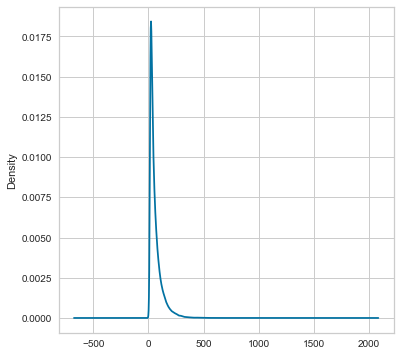

In [105]:
y.plot(kind='kde')

In [106]:
y.skew()

3.9996006344643487

Si comparem amb el seu logaritme:

<AxesSubplot:ylabel='Density'>

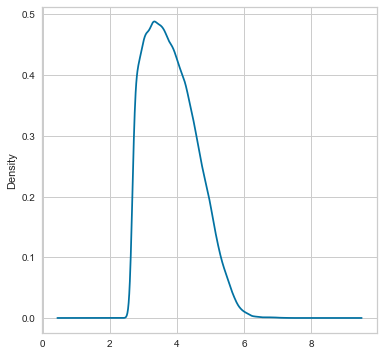

In [107]:
z=np.log(y)


z.plot(kind='kde')

In [108]:
np.log(y).skew()

0.493240446451579

Es pot treballar amb el logaritme de la columna objectiu y perquè té molta menys cua:

Ho aplicarem al algoritme de KNN.



#### KNN

In [109]:
#Fem Train/Test amb el nou objectiu y2=log(y):
y2=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(df_reduced3, y2, test_size=0.3, random_state=1)


In [110]:
n_neighbors=3
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='distance')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y2_knn=knn.predict(X_test)

In [111]:
print(f"Train error = {round(calc_error(y1_knn,y_train),2)}%  in knn algorithm.")
print(f"Test error = {round(calc_error(y2_knn,y_test),2)}% in knn algorithm.")
train_err.append(round(calc_error(y1_knn,y_train),2))
test_err.append(round(calc_error(y2_knn,y_test),2))
print (f'R2 :{round(r2_score(y_test,y2_knn),2)}')

Train error = 0.0%  in knn algorithm.
Test error = 10.3% in knn algorithm.
R2 :0.57


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


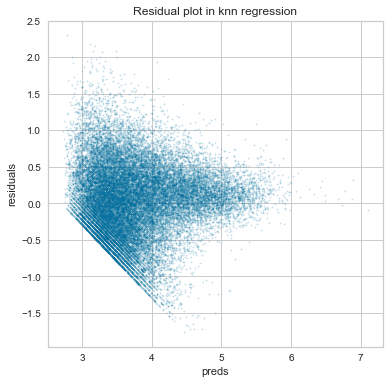

In [112]:
plot_residuals(y2_knn,y_test,'knn regression')

La r2 disminueix sensiblement. De la diferencia d'error (train vs test) s'observa clarament un overfitting del model. Respecte la distribució dels residuals s'observa clarament un a estructuració per a valors de residuals <0. Hi ha molta informació oculta en els residuals.

#### Ridge Regresion

In [113]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_RR_predict=model.predict(X_train)
y_RR_predict_test=model.predict(X_test)

In [114]:
print(f"Train error = {round(calc_error(y_RR_predict,y_train),2)}% in Ridge regression.")
print(f"Test error = {round(calc_error(y_RR_predict_test,y_test),2)}% in Ridge regression.")
print (f'R2 :{round(r2_score(list(y_test.values),list(y_RR_predict_test)),3)}')

Train error = 9.05% in Ridge regression.
Test error = 9.08% in Ridge regression.
R2 :0.672


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


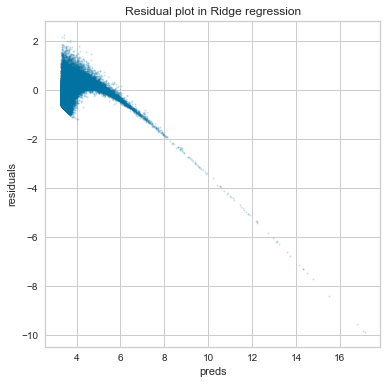

In [115]:
plot_residuals(y_RR_predict,y_train,'Ridge regression')

Amb la regressió Ridge s'aconsegueix disminuir l'error sensiblement però empitjora la puntuació del model. La diferencia d'error entre el test i el train és mínima, demostrant un model robust. De la graficació dels residuals es pot veure que inclouen molta informació ja que s'observa una alta lineabilitat al augmentar el valor de les prediccions.

### One Hot Encoding

Per tal d'incloure les variables categòriques en la regressió lineal es poden transformar en diverses variables dummie:

In [116]:
flights2008_df_dropNull[['Month', 'DayofMonth', 'DayOfWeek']]=flights2008_df_dropNull[['Month', 'DayofMonth', 
                                                                                       'DayOfWeek']].astype('category')
flights2008_df_dropNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247488 entries, 4 to 7009718
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   Month              1247488 non-null  category
 1   DayofMonth         1247488 non-null  category
 2   DayOfWeek          1247488 non-null  category
 3   DepTime            1247488 non-null  float64 
 4   CRSDepTime         1247488 non-null  int64   
 5   ArrTime            1247488 non-null  float64 
 6   CRSArrTime         1247488 non-null  int64   
 7   UniqueCarrier      1247488 non-null  object  
 8   FlightNum          1247488 non-null  int64   
 9   TailNum            1247488 non-null  object  
 10  ActualElapsedTime  1247488 non-null  float64 
 11  CRSElapsedTime     1247488 non-null  float64 
 12  AirTime            1247488 non-null  float64 
 13  ArrDelay           1247488 non-null  float64 
 14  DepDelay           1247488 non-null  float64 
 15  Origin         

In [117]:
flights2008_df_dropNull_dummies=pd.get_dummies(flights2008_df_dropNull[['Month', 'DayofMonth','DayOfWeek', 'UniqueCarrier',
                                                                       ]])

In [118]:
flights2008_df_dropNull_dummies=pd.concat([flights2008_df_dropNull.drop(['Month', 'DayofMonth','DayOfWeek',
                                                                         'UniqueCarrier'],axis=1),
                                            flights2008_df_dropNull_dummies],axis=1 )

In [119]:
flights2008_df_dropNull_dummies.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'DayofMonth_1', 'DayofMonth_2', 'DayofMonth_3',
       'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7',
       'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11',
       'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15',
       'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19',
       'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23',
       'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27',
       'DayofMonth_28', 'DayofMonth_29', 'D

Per tal de poder comparar amb l'exercici anterior s'han d'eliminar les variables no emprades anteriorment:

In [120]:
flights2008_df_dropNull_dummies.drop(['ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','CarrierDelay',
                              'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay', 'ArrTime',
                            'DepTime','CRSArrTime'], axis=1,inplace=True)


Aquest canvis sobretot han de repercutir en els models de regressió no lineal. Primer generem les mostres de train i test, n'agafem una mostra de 100000 valors i després provem el model de Random Forest amb la metodologia train/test: 

In [121]:
df_dummies_reduct=flights2008_df_dropNull_dummies.sample(n=100000,random_state=42)

X=df1_reg.loc[:,df1_reg.columns!='ArrDelay']

X.head()[:2]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6580677,12,1,1,1054.0,1027,1353.0,1256,YV,7322,N519LR,...,ORD,BUF,473,2.0,51.0,0.0,0.0,30.0,0.0,27.0
1293654,3,13,4,2113.0,2105,4.0,2348,XE,2624,N14143,...,IAH,MSP,1034,6.0,24.0,8.0,0.0,8.0,0.0,0.0


In [122]:
X=df_dummies_reduct.loc[:,df_dummies_reduct.columns!='ArrDelay']
numerical_index=X.dtypes[X.dtypes!='object'].index
X=X[numerical_index]
y=df_dummies_reduct.ArrDelay
X.shape

(100000, 74)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Random Forest

In [124]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [125]:
rf.fit(X_train,y_train)
y1_rf=rf.predict(X_train)
y2_rf=rf.predict(X_test)

In [126]:
print(f"Train error = {round(calc_error(y1_rf,y_train),2)}% in Random Forest Regression")
print(f"Test error = {round(calc_error(y2_rf,y_test),2)}% in Random Forest Regression")
print (f'R2 :{round(r2_score(list(y_test.values),list(y2_rf)),3)}')

Train error = 9.94% in Random Forest Regression
Test error = 26.82% in Random Forest Regression
R2 :0.907


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


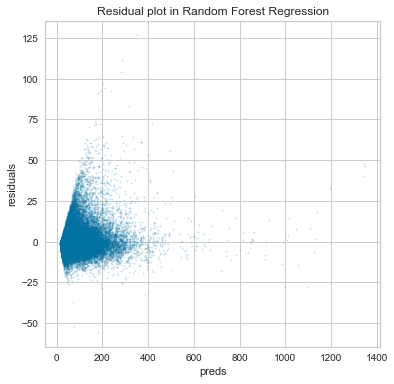

In [127]:
plot_residuals(y1_rf,y_train,'Random Forest Regression')

No hi ha una millora significativa. Provem en aquest cas a tornar a generar el model sense eliminar les columnes:

In [128]:
flights2008_df_dropNull_dummies=pd.get_dummies(flights2008_df_dropNull[['Month', 'DayofMonth','DayOfWeek', 'UniqueCarrier',
                                                                       ]])

In [129]:
flights2008_df_dropNull_dummies=pd.concat([flights2008_df_dropNull.drop(['Month', 'DayofMonth','DayOfWeek',
                                                                         'UniqueCarrier'],axis=1),
                                            flights2008_df_dropNull_dummies],axis=1 )

In [130]:
df_dummies_reduct=flights2008_df_dropNull_dummies.sample(n=100000,random_state=42)
X=df_dummies_reduct.loc[:,df_dummies_reduct.columns!='ArrDelay']
numerical_index=X.dtypes[X.dtypes!='object'].index
X=X[numerical_index]
y=df_dummies_reduct.ArrDelay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [131]:
X.shape

(100000, 87)

In [132]:
rf.fit(X_train,y_train)
y1_rf=rf.predict(X_train)
y2_rf=rf.predict(X_test)

In [133]:
print(f"Train error = {round(calc_error(y1_rf,y_train),2)}% in Random Forest Regression")
print(f"Test error = {round(calc_error(y2_rf,y_test),2)}% in Random Forest Regression")
print (f'R2 :{round(r2_score(list(y_test.values),list(y2_rf)),3)}')

Train error = 0.68% in Random Forest Regression
Test error = 1.84% in Random Forest Regression
R2 :0.994


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


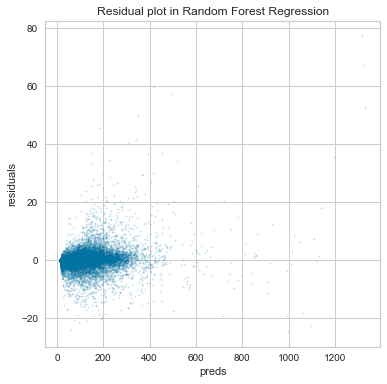

In [134]:
plot_residuals(y1_rf,y_train,'Random Forest Regression')

Al incloure totes les variables on hi ha la major informació de correlació el model funciona molt bé.

# Nivell 3

**- Exercici 6:**
No utilitzis la variable DepDelay a l’hora de fer prediccions

Apliquem la millor metodologia fins ara (ultim cas de l'exercici 5) traient la variable de DepDelay :

In [135]:
X.drop(['DepDelay'],axis=1, inplace=True)

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 6580677 to 2572312
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DepTime            100000 non-null  float64
 1   CRSDepTime         100000 non-null  int64  
 2   ArrTime            100000 non-null  float64
 3   CRSArrTime         100000 non-null  int64  
 4   FlightNum          100000 non-null  int64  
 5   ActualElapsedTime  100000 non-null  float64
 6   CRSElapsedTime     100000 non-null  float64
 7   AirTime            100000 non-null  float64
 8   Distance           100000 non-null  int64  
 9   TaxiIn             100000 non-null  float64
 10  TaxiOut            100000 non-null  float64
 11  CarrierDelay       100000 non-null  float64
 12  WeatherDelay       100000 non-null  float64
 13  NASDelay           100000 non-null  float64
 14  SecurityDelay      100000 non-null  float64
 15  LateAircraftDelay  100000 non-null  float64


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Random Forest

In [138]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [139]:
rf.fit(X_train,y_train)
y1_rf=rf.predict(X_train)
y2_rf=rf.predict(X_test)

In [140]:
print(f"Train error = {round(calc_error(y1_rf,y_train),2)}% in Random Forest Regression")
print(f"Test error = {round(calc_error(y2_rf,y_test),2)}% in Random Forest Regression")
print (f'R2 :{round(r2_score(list(y_test.values),list(y2_rf)),3)}')

Train error = 0.32% in Random Forest Regression
Test error = 0.86% in Random Forest Regression
R2 :0.992


Si comparem amb els resultats anteriors:
    Train error = 0.68% in Random Forest Regression
    Test error = 1.84% in Random Forest Regression
    R2 :0.994
Els resultats són més precisos (amb menys error) però s'ajustem lleugerament pitjor.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


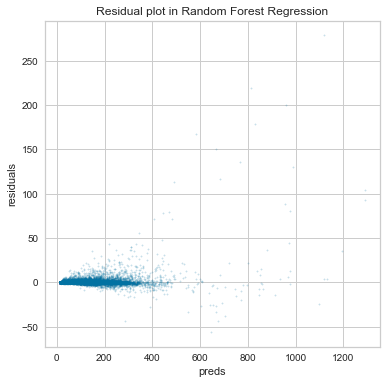

In [141]:
plot_residuals(y1_rf,y_train,'Random Forest Regression')

La diferència és mínima, com ja haviem vist en l'estudi de correlacions l'ArrDelay estava directament i altament correlacionada amb el DepDelay. És lògic ja que el retard a l'arribada la majoria de vegades es genera en el retràs de la sortida de l'avió.

Comparant models de regressió: https://www.kaggle.com/ankitjha/comparing-regression-models

Metrics to evaluate regression:
    https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

# Treballant amb Pycaret:

Fem part de l'exercici amb Pycaret (una llibrería que fa una exploració entre els diferents mètodes de regressió sense una neteja previa de les dades). Amb Pycaret el codi es redueix al mínim però a la vegada té l'efecte de la caixa negre, no savem ben bé que està fent referent al tractament de dades o a l'optimització de cada model. Sense dubte és una eina molt potent però abans caldria tenir molt clars els fonaments i paràmetres de cada model de regressió.

Per agilitzar els calculs i el funcionament de Pycaret només agafem un 0,1% de la base de dades original.

In [29]:
flights2008_df_1=flights2008_df_dropNull.sample(frac=0.001,random_state=42) #agafem un 0.1% de la base de dades inicial per agilitzar calculs, 

In [30]:
flights2008_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 6580677 to 331725
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1247 non-null   int64  
 1   DayofMonth         1247 non-null   int64  
 2   DayOfWeek          1247 non-null   int64  
 3   DepTime            1247 non-null   float64
 4   CRSDepTime         1247 non-null   int64  
 5   ArrTime            1247 non-null   float64
 6   CRSArrTime         1247 non-null   int64  
 7   UniqueCarrier      1247 non-null   object 
 8   FlightNum          1247 non-null   int64  
 9   TailNum            1247 non-null   object 
 10  ActualElapsedTime  1247 non-null   float64
 11  CRSElapsedTime     1247 non-null   float64
 12  AirTime            1247 non-null   float64
 13  ArrDelay           1247 non-null   float64
 14  DepDelay           1247 non-null   float64
 15  Origin             1247 non-null   object 
 16  Dest            

In [31]:
exp_reg01 = setup(data = flights2008_df_1, target = 'ArrDelay', session_id=123, html=False, silent=True, verbose=True) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target,ArrDelay
2,Original Data,"(1247, 25)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(872, 1037)"


L'evaluació inicial de Pycaret esmenta que hi ha dades nules i detecta colinearibilitat directe entre algun dels paràmetres i el temps de retràs d'arribada i l'elimina.

In [32]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0,0.0008,1.0,0.0,0.0,1.702


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.000,0.0008,1.0000,0.0000,0.0000,1.702
lasso,Lasso Regression,0.2213,0.605,0.5260,0.9998,0.0121,0.0054,0.205


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148
knn,K Neighbors Regressor,32.7694,2246.3424,47.0299,0.2107,0.6692,0.7065,0.158


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
dt,Decision Tree Regressor,9.1641,267.6861,16.0446,0.9065,0.2309,0.1649,0.076
llar,Lasso Least Angle Regression,24.6741,1165.9468,33.8493,0.5930,0.5328,0.6051,1.148


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
rf,Random Forest Regressor,6.8293,177.4990,12.8499,0.9392,0.1626,0.1175,1.797
dt,Decision Tree Regressor,9.1641,267.6861,16.0446,0.9065,0.2309,0.1649,0.076


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
et,Extra Trees Regressor,6.2120,155.3815,11.9673,0.9471,0.1514,0.1071,2.731
rf,Random Forest Regressor,6.8293,177.4990,12.8499,0.9392,0.1626,0.1175,1.797


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
et,Extra Trees Regressor,6.2120,155.3815,11.9673,0.9471,0.1514,0.1071,2.731
rf,Random Forest Regressor,6.8293,177.4990,12.8499,0.9392,0.1626,0.1175,1.797


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
gbr,Gradient Boosting Regressor,6.5936,135.3529,11.2051,0.9534,0.1608,0.1271,1.063
et,Extra Trees Regressor,6.2120,155.3815,11.9673,0.9471,0.1514,0.1071,2.731


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
gbr,Gradient Boosting Regressor,6.5936,135.3529,11.2051,0.9534,0.1608,0.1271,1.063
et,Extra Trees Regressor,6.2120,155.3815,11.9673,0.9471,0.1514,0.1071,2.731


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
gbr,Gradient Boosting Regressor,6.5936,135.3529,11.2051,0.9534,0.1608,0.1271,1.063
et,Extra Trees Regressor,6.2120,155.3815,11.9673,0.9471,0.1514,0.1071,2.731


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0005,0.0000,0.0008,1.0000,0.0000,0.0000,1.702
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.058
br,Bayesian Ridge,0.0002,0.0000,0.0005,1.0000,0.0000,0.0000,3.868
lasso,Lasso Regression,0.2213,0.6050,0.5260,0.9998,0.0121,0.0054,0.205
ridge,Ridge Regression,0.2323,0.3259,0.3551,0.9998,0.0093,0.0063,0.198
en,Elastic Net,0.1568,0.5546,0.4224,0.9998,0.0093,0.0037,0.186
huber,Huber Regressor,3.8476,37.3315,5.9696,0.9855,0.1012,0.0783,0.914
par,Passive Aggressive Regressor,7.0912,99.1923,8.7794,0.9679,0.2589,0.1745,0.205
gbr,Gradient Boosting Regressor,6.5936,135.3529,11.2051,0.9534,0.1608,0.1271,1.063
et,Extra Trees Regressor,6.2120,155.3815,11.9673,0.9471,0.1514,0.1071,2.731


La taula anterior triga mes de 10 minuts en generar-se!
Mostra les millors regressions amb una correlació en alguns casos total R2=1.0000. El model Bayesian Ridge és el que genera menys errors. Escollim els tres models següents per desenvolupar:
* Lasso Regression	(lasso)
* Decision Tree Regressor (dt)
* Light Gradient Boosting Machine (lightgbm)

Generem data frames per entrenar i testejar amb els diferents models de regressió:

##  Lasso Regression

In [33]:
lasso=create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3993,4.9043,2.2146,0.9980,0.0421,0.0081
1,0.1991,0.0885,0.2976,1.0000,0.0059,0.0044
2,0.1994,0.0845,0.2907,1.0000,0.0112,0.0059
3,0.1792,0.0641,0.2532,1.0000,0.0062,0.0044
4,0.2025,0.2190,0.4679,0.9999,0.0093,0.0044
5,0.1685,0.0422,0.2054,1.0000,0.0062,0.0045
6,0.2396,0.2877,0.5363,0.9999,0.0136,0.0066
7,0.1614,0.0406,0.2016,1.0000,0.0061,0.0046
8,0.2204,0.1210,0.3479,1.0000,0.0111,0.0055
9,0.2438,0.1979,0.4449,0.9999,0.0090,0.0057


In [34]:
tuned_lasso=tune_model(lasso)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7903,1.2792,1.1310,0.9995,0.0230,0.0168
1,0.8385,1.9864,1.4094,0.9994,0.0234,0.0160
2,0.6233,0.7876,0.8875,0.9997,0.0267,0.0167
3,0.7575,1.8475,1.3592,0.9994,0.0194,0.0147
4,0.7280,0.9089,0.9533,0.9998,0.0188,0.0142
5,0.6877,0.8512,0.9226,0.9997,0.0289,0.0183
6,0.6613,0.8917,0.9443,0.9995,0.0262,0.0172
7,0.6339,0.7736,0.8796,0.9996,0.0233,0.0168
8,0.7786,1.0895,1.0438,0.9997,0.0260,0.0182
9,0.6795,0.8549,0.9246,0.9997,0.0222,0.0161


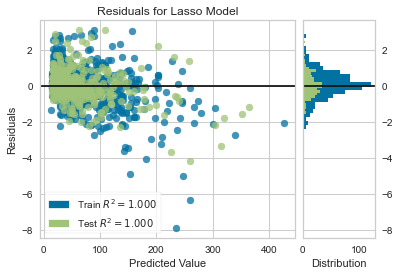

In [35]:
plot_model(tuned_lasso)

El model s'adapta a les dades perfectament, s'han detectat les correlacions correctes.

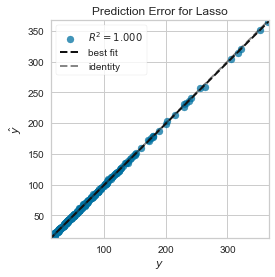

In [36]:
plot_model(tuned_lasso, plot='error')

Els errors són molt baixos.

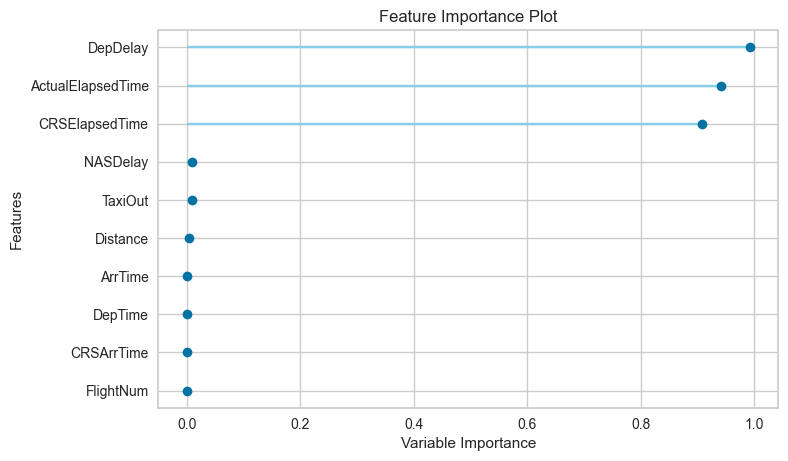

In [37]:
plot_model(tuned_lasso, plot='feature')

En aquest cas són tres factors amb una ponderància força semblant, entre ells és lleugerament més rellevant el DepDelay.

## Decision Tree Regressor

In [63]:
dt=create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.1136,193.7500,13.9194,0.9225,0.2515,0.1812
1,10.1591,395.3182,19.8826,0.8853,0.1985,0.1370
2,7.6897,147.7126,12.1537,0.9505,0.2312,0.1643
3,8.1839,360.8736,18.9967,0.8777,0.2065,0.1366
4,9.5977,310.0345,17.6078,0.9275,0.1668,0.1257
5,8.2874,178.3103,13.3533,0.9278,0.2312,0.1707
6,9.3563,280.7356,16.7552,0.8550,0.2832,0.2020
7,7.7126,158.7931,12.6013,0.9121,0.2240,0.1557
8,12.3793,467.7816,21.6283,0.8777,0.2718,0.2053
9,9.1609,183.5517,13.5481,0.9291,0.2446,0.1706


In [64]:
tuned_dt=tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.7458,135.3588,11.6344,0.9459,0.2087,0.1583
1,10.4307,363.5632,19.0673,0.8945,0.1994,0.1499
2,7.3973,113.4666,10.6521,0.9620,0.1995,0.1533
3,9.8906,434.8843,20.8539,0.8526,0.2051,0.1489
4,9.4491,265.4074,16.2913,0.9380,0.1702,0.1353
5,8.7434,184.0628,13.5670,0.9255,0.2387,0.1848
6,9.1818,255.0170,15.9693,0.8683,0.2732,0.2056
7,7.7275,154.0181,12.4104,0.9148,0.2388,0.1616
8,12.4396,486.4899,22.0565,0.8728,0.2664,0.2240
9,8.3265,143.5735,11.9822,0.9446,0.2118,0.1551


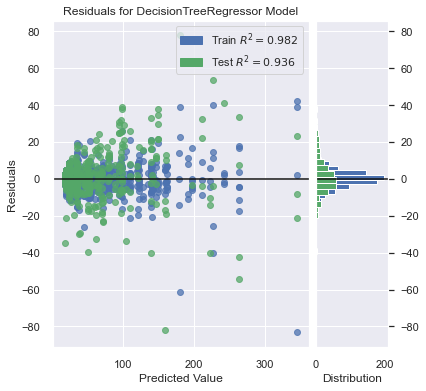

In [65]:
plot_model(tuned_dt)

In [ ]:
Hi ha un lleuger overfitting al disminuir la r2 del train al test

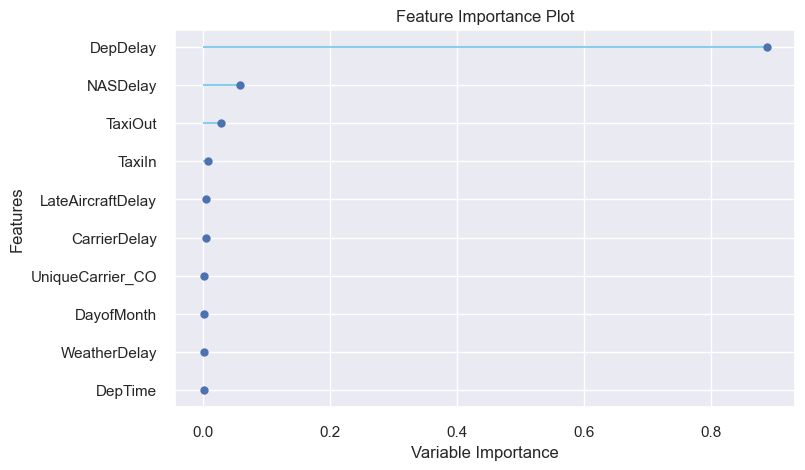

In [66]:
plot_model(tuned_dt,plot='feature')

El paràmetre més rellevant és el DepDelay amb >80% de ponderància!!

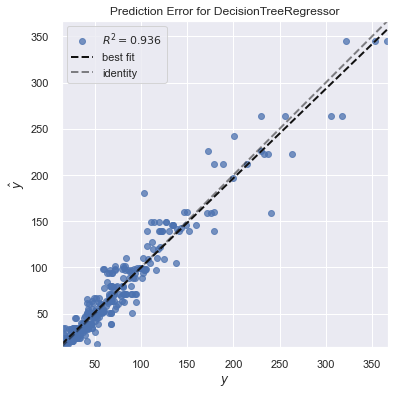

In [67]:
plot_model(tuned_dt,plot='error')

## Light Gradient Boosting Machine

In [68]:
lightgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.8543,233.9348,15.2949,0.9065,0.1591,0.1142
1,7.4329,265.8490,16.3049,0.9228,0.1283,0.0918
2,7.0845,150.1720,12.2545,0.9497,0.1245,0.1006
3,4.7446,208.9627,14.4555,0.9292,0.1175,0.0730
4,8.0560,252.1835,15.8803,0.9411,0.1110,0.0909
5,4.2481,42.3268,6.5059,0.9829,0.1171,0.0846
6,5.9419,86.6880,9.3106,0.9552,0.1481,0.1143
7,4.6050,54.0394,7.3511,0.9701,0.1217,0.0930
8,8.5854,451.7605,21.2547,0.8819,0.1595,0.1196
9,5.4559,100.1113,10.0056,0.9613,0.1018,0.0805


In [69]:
tuned_lightgbm=tune_model(lightgbm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.5s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.9842,225.9971,15.0332,0.9096,0.2617,0.2116
1,9.9273,240.2942,15.5014,0.9303,0.2319,0.1839
2,8.1908,134.0828,11.5794,0.9551,0.2046,0.1745
3,6.1491,172.8897,13.1488,0.9414,0.1444,0.1094
4,10.6120,299.6959,17.3117,0.9300,0.2244,0.1697
5,9.1751,159.1664,12.6161,0.9355,0.3062,0.2215
6,8.0504,139.5437,11.8129,0.9279,0.2468,0.2098
7,8.5113,132.2482,11.4999,0.9268,0.2356,0.2077
8,10.0584,403.0701,20.0766,0.8946,0.2068,0.1703
9,12.7786,297.6557,17.2527,0.8850,0.3199,0.2649


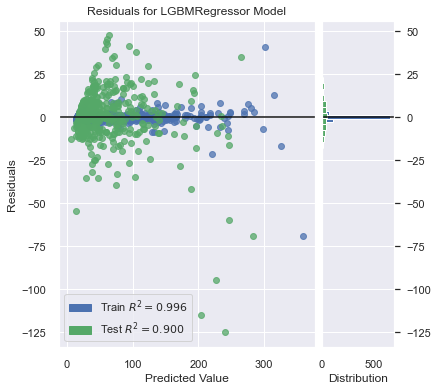

In [70]:
plot_model(tuned_lightgbm) 

Hi ha un  overfitting moderat al disminuir la r2 del train al test

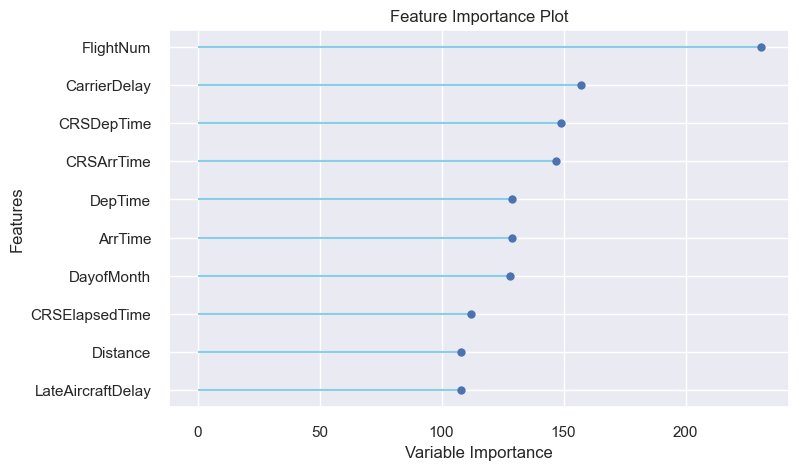

In [71]:
plot_model(tuned_lightgbm, plot='feature')

És important destacar que entre els paràmetres més rellevants no hi ha el DepDelay i el que té més ponderació és el número de vol!!

# Tornem a fer el mateix però eliminant el DepDelay (Exercici 6):

In [38]:
flights2008_df_1=flights2008_df_dropNull.sample(frac=0.001,random_state=42) #agafem un 0.1% de la base de dades inicial per agilitzar calculs, 

In [39]:
flights2008_df_1.drop('DepDelay',axis=1, inplace=True)

In [40]:
flights2008_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 6580677 to 331725
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1247 non-null   int64  
 1   DayofMonth         1247 non-null   int64  
 2   DayOfWeek          1247 non-null   int64  
 3   DepTime            1247 non-null   float64
 4   CRSDepTime         1247 non-null   int64  
 5   ArrTime            1247 non-null   float64
 6   CRSArrTime         1247 non-null   int64  
 7   UniqueCarrier      1247 non-null   object 
 8   FlightNum          1247 non-null   int64  
 9   TailNum            1247 non-null   object 
 10  ActualElapsedTime  1247 non-null   float64
 11  CRSElapsedTime     1247 non-null   float64
 12  AirTime            1247 non-null   float64
 13  ArrDelay           1247 non-null   float64
 14  Origin             1247 non-null   object 
 15  Dest               1247 non-null   object 
 16  Distance        

In [41]:
exp_reg01 = setup(data = flights2008_df_1, target = 'ArrDelay', session_id=123, html=False, silent=True, verbose=True) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target,ArrDelay
2,Original Data,"(1247, 24)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(872, 1036)"


L'evaluació inicial de Pycaret esmenta que hi ha dades nules i detecta colinearibilitat directe entre algun dels paràmetres i el temps de retràs d'arribada i l'elimina.

In [42]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0,0.0018,1.0,0.0,0.0,1.466


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.000,1.466
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.004,0.056


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
llar,Lasso Least Angle Regression,39.4109,2921.7526,53.6043,-0.0160,0.7750,0.9633,0.044


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
llar,Lasso Least Angle Regression,39.4109,2921.7526,53.6043,-0.0160,0.7750,0.9633,0.044


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
llar,Lasso Least Angle Regression,39.4109,2921.7526,53.6043,-0.0160,0.7750,0.9633,0.044


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
llar,Lasso Least Angle Regression,39.4109,2921.7526,53.6043,-0.0160,0.7750,0.9633,0.044


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906
llar,Lasso Least Angle Regression,39.4109,2921.7526,53.6043,-0.0160,0.7750,0.9633,0.044


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906
knn,K Neighbors Regressor,33.6544,2394.0603,48.5328,0.1581,0.6873,0.7280,0.178


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906
dt,Decision Tree Regressor,9.1605,390.3231,18.9183,0.8666,0.1852,0.1278,0.078


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906
rf,Random Forest Regressor,6.9106,224.8782,14.2292,0.9281,0.1402,0.0973,1.962


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906
et,Extra Trees Regressor,5.1405,175.3826,12.1454,0.9465,0.1125,0.0705,2.814


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906
et,Extra Trees Regressor,5.1405,175.3826,12.1454,0.9465,0.1125,0.0705,2.814


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
gbr,Gradient Boosting Regressor,4.9251,97.3007,9.1339,0.9697,0.1209,0.0934,0.999
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
gbr,Gradient Boosting Regressor,4.9251,97.3007,9.1339,0.9697,0.1209,0.0934,0.999
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
gbr,Gradient Boosting Regressor,4.9251,97.3007,9.1339,0.9697,0.1209,0.0934,0.999
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0009,0.0000,0.0018,1.0000,0.0000,0.0000,1.466
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.045
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.051
br,Bayesian Ridge,0.0005,0.0000,0.0013,1.0000,0.0000,0.0000,1.086
ridge,Ridge Regression,0.2548,0.8086,0.4887,0.9997,0.0121,0.0061,0.149
en,Elastic Net,0.1546,2.0063,0.6325,0.9992,0.0162,0.0037,0.058
lasso,Lasso Regression,0.1671,2.6642,0.7190,0.9989,0.0204,0.0040,0.056
par,Passive Aggressive Regressor,3.2905,44.5575,5.2955,0.9855,0.1006,0.0751,0.253
gbr,Gradient Boosting Regressor,4.9251,97.3007,9.1339,0.9697,0.1209,0.0934,0.999
huber,Huber Regressor,4.8009,145.9212,11.0267,0.9524,0.1718,0.0812,0.906


La taula anterior triga mes de 10 minuts en generar-se!
Mostra les millors regressions amb una correlació en alguns casos total R2=1.0000. El model Bayesian Ridge és el que genera menys errors. Escollim els tres models següents per desenvolupar:
* Lasso Regression	(lasso)
* Decision Tree Regressor (dt)
* Light Gradient Boosting Machine (lightgbm)

Generem data frames per entrenar i testejar amb els diferents models de regressió:

##  Lasso Regression

In [43]:
lasso=create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6754,25.9890,5.0979,0.9896,0.1465,0.0125
1,0.1048,0.0238,0.1542,1.0000,0.0033,0.0025
2,0.1080,0.0388,0.1971,1.0000,0.0091,0.0037
3,0.0905,0.0126,0.1123,1.0000,0.0033,0.0026
4,0.1561,0.2098,0.4581,1.0000,0.0079,0.0030
5,0.1019,0.0149,0.1220,1.0000,0.0038,0.0028
6,0.1319,0.2357,0.4855,0.9999,0.0122,0.0040
7,0.0862,0.0102,0.1010,1.0000,0.0037,0.0029
8,0.1069,0.0551,0.2348,1.0000,0.0083,0.0029
9,0.1095,0.0516,0.2271,1.0000,0.0056,0.0029


In [44]:
tuned_lasso=tune_model(lasso)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6978,25.9771,5.0968,0.9896,0.1464,0.0125
1,0.2575,0.1725,0.4154,0.9999,0.0076,0.0057
2,0.2460,0.3011,0.5487,0.9999,0.0280,0.0087
3,0.2003,0.0701,0.2647,1.0000,0.0077,0.0057
4,0.4090,1.6614,1.2890,0.9996,0.0232,0.0074
5,0.2289,0.0847,0.2910,1.0000,0.0079,0.0060
6,0.3495,1.9171,1.3846,0.9990,0.0387,0.0106
7,0.2105,0.0618,0.2486,1.0000,0.0091,0.0070
8,0.2769,0.4134,0.6429,0.9999,0.0243,0.0077
9,0.2797,0.3925,0.6265,0.9998,0.0157,0.0074


In [54]:
print(tuned_lasso) # Per imprimir els paràmetres optimitzats:

Lasso(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


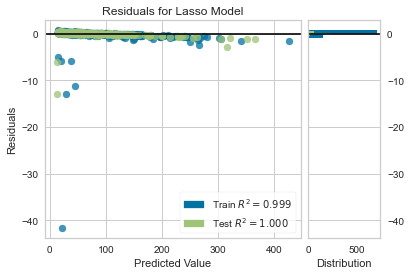

In [45]:
plot_model(tuned_lasso)

El model igualment s'adapta a les dades perfectament, s'han detectat les correlacions correctes.

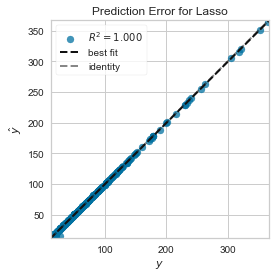

In [46]:
plot_model(tuned_lasso, plot='error')

Els errors segueixen sent molt baixos.

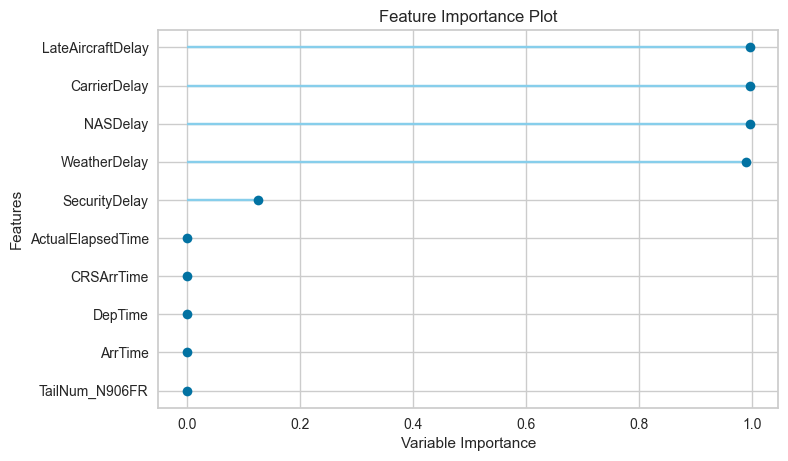

In [47]:
plot_model(tuned_lasso, plot='feature')

En aquest cas, passen de tres factors quasi igualment ponderats a 4. Destacar que els 4 factors són mesures de retràs per diferents causes!!

## Decision Tree Regressor

In [48]:
dt=create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.6591,802.3409,28.3256,0.6792,0.2140,0.1434
1,10.7159,484.5568,22.0127,0.8594,0.2183,0.1254
2,10.8506,491.7011,22.1743,0.8354,0.1927,0.1438
3,9.8391,566.3908,23.7990,0.8080,0.1853,0.1300
4,10.9310,556.1264,23.5823,0.8700,0.1970,0.1270
5,8.0345,254.2644,15.9457,0.8970,0.1773,0.1204
6,6.6552,138.4483,11.7664,0.9285,0.1724,0.1201
7,5.5172,90.5057,9.5135,0.9499,0.1523,0.1143
8,8.6782,309.4828,17.5921,0.9191,0.1787,0.1270
9,8.7241,209.4138,14.4711,0.9191,0.1643,0.1268


In [49]:
tuned_dt=tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.8286,274.1009,16.5560,0.8904,0.2338,0.2020
1,12.8363,499.4961,22.3494,0.8550,0.2687,0.2068
2,10.4346,218.1687,14.7705,0.9269,0.2390,0.2093
3,11.2746,361.4170,19.0110,0.8775,0.2542,0.2204
4,11.8991,513.5504,22.6617,0.8800,0.2348,0.1759
5,9.2016,219.3485,14.8104,0.9112,0.2378,0.1943
6,8.9409,158.9584,12.6079,0.9179,0.2527,0.2184
7,8.3551,132.5703,11.5139,0.9266,0.2391,0.1990
8,9.9817,410.8153,20.2686,0.8926,0.2139,0.1683
9,9.1895,155.0333,12.4512,0.9401,0.2188,0.1899


In [55]:
print(tuned_dt) # Per imprimir els paràmetres optimitzats:

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


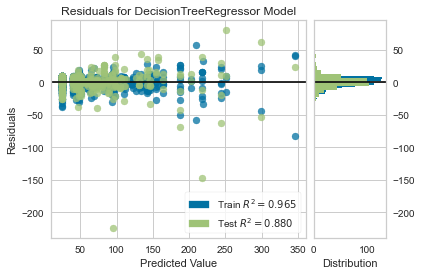

In [50]:
plot_model(tuned_dt)

Hi ha un overfitting considerable!

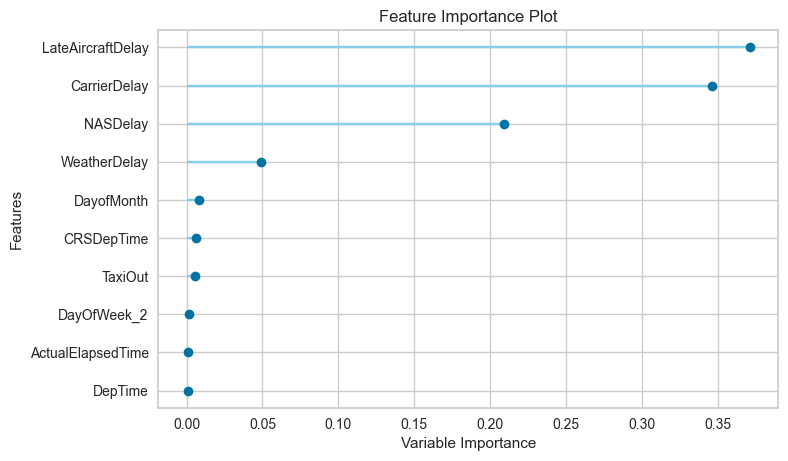

In [52]:
plot_model(tuned_dt,plot='feature')

Passem d'un sol paràmetre rellevant a que n'hi hagin 3. Tots 3 són temps de retard per diferentes causes.

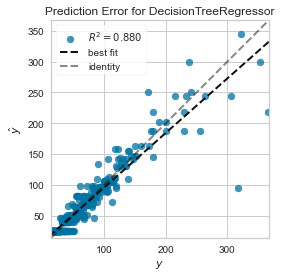

In [53]:
plot_model(tuned_dt,plot='error')

El overfitting s'observa claramenten la diferència entre el best fit i la línea identitat.

## Light Gradient Boosting Machine

In [56]:
lightgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.7061,194.5040,13.9465,0.9222,0.2234,0.1443
1,11.6662,500.6980,22.3763,0.8547,0.2112,0.1470
2,7.1316,188.0716,13.7139,0.9370,0.1591,0.1198
3,8.4233,294.7229,17.1675,0.9001,0.1818,0.1338
4,12.7715,975.9908,31.2409,0.7719,0.2029,0.1223
5,8.4973,220.3756,14.8451,0.9107,0.1799,0.1316
6,10.3688,408.4418,20.2099,0.7891,0.2213,0.1734
7,7.2964,239.2318,15.4671,0.8676,0.1571,0.1161
8,10.1187,700.8625,26.4738,0.8168,0.1775,0.1154
9,10.2549,398.4906,19.9622,0.8461,0.2052,0.1549


In [57]:
tuned_lightgbm=tune_model(lightgbm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.4182,461.4133,21.4805,0.8155,0.4485,0.3636
1,17.2620,628.3150,25.0662,0.8176,0.3948,0.3597
2,15.5093,460.6049,21.4617,0.8458,0.4488,0.3792
3,21.3250,919.9897,30.3313,0.6882,0.4898,0.4567
4,17.9489,922.2509,30.3686,0.7845,0.3582,0.2973
5,16.0676,568.3438,23.8400,0.7698,0.4565,0.4101
6,14.0139,466.7054,21.6034,0.7590,0.4015,0.3558
7,14.9419,405.6034,20.1396,0.7755,0.4325,0.4051
8,16.0355,741.0988,27.2231,0.8062,0.3459,0.3038
9,14.8727,439.1529,20.9560,0.8304,0.3513,0.3217


In [58]:
print(tuned_lightgbm) # Per imprimir els paràmetres optimitzats:

LGBMRegressor(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.4, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
              random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


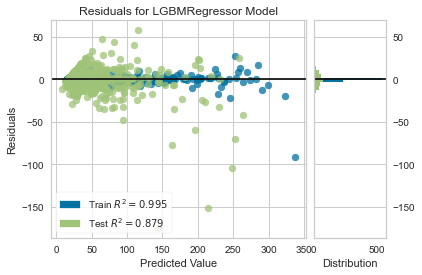

In [59]:
plot_model(tuned_lightgbm) 

Hi ha un  overfitting moderat al disminuir la r2 del train al test

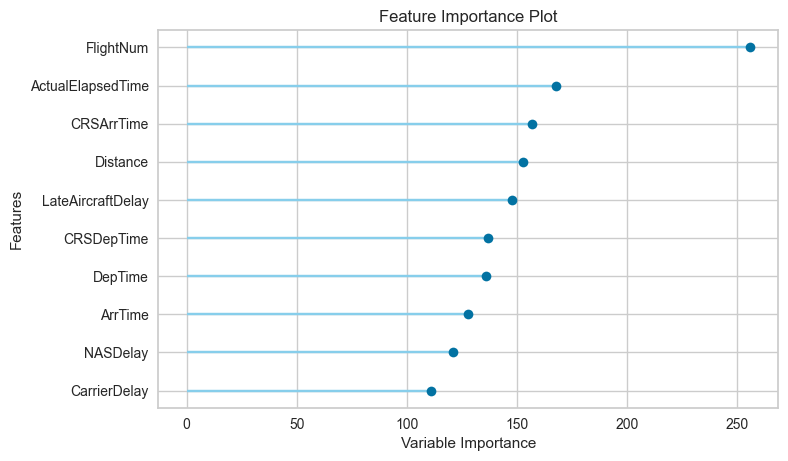

In [60]:
plot_model(tuned_lightgbm, plot='feature')

Extranyament el paràmetre que més contribueix és el número de vol, tot i que hi ha forces variables que també hi contribueixen.

**Fonts de formació:**

Pycaret video explicatiu:
https://youtu.be/PEzGtSs45Rg

Pàgina web amb exemple de codi: https://machinelearningmastery.com/pycaret-for-machine-learning/
                                https://medium.datadriveninvestor.com/pycaret-a-faster-way-to-build-machine-learning-models-d4cbce6a6633

https://towardsdatascience.com/5-things-you-are-doing-wrong-in-pycaret-e01981575d2a

Github amb exemples i bases de dades: https://github.com/pycaret/pycaret

Exemple regression: https://youtu.be/E3Gj9GcTOxQ

Què fa Pycaret:

<img src=https://miro.medium.com/max/1400/0*QUeSSQ3JezNA6cRv>